<a href="https://colab.research.google.com/github/amitshakarchy/big-data-analysis/blob/main/HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Amit Shakarchy

Github: https://github.com/amitshakarchy/big-data-analysis

# Homework Assignment 2
### [The Art of Analyzing Big Data - The Data Scientist’s Toolbox](https://www.ise.bgu.ac.il/labs/fire/lectures.html)
#### By Dr. Michael Fire 

## Dataset Collecting

**Question 1**: Write a function that collects all titles and number of votes for each title of a given [hacker news page](http://news.ycombinator.com) (15pt)


In [2]:
import requests
def get_raw_html(u):
  html = requests.get(u).content.decode('utf-8')
  return html
  
# get_raw_html("http://neopythonic.blogspot.com/")

In [3]:
from bs4 import BeautifulSoup
dic =  dict()
def get_all_titles_votes_num(u):
  html = get_raw_html(u)
  soup = BeautifulSoup(html, 'html.parser')
  titles = soup.findAll('tr', attrs={'class': 'athing'})
  votes = soup.findAll('span', attrs={'class': 'score'})
  for title_data in titles:
    title = title_data.find('a', attrs={"class":"titlelink"}).contents[0]

    votes_id = title_data.attrs['id']
    votes_num = soup.find('span', attrs={"id":f"score_{votes_id}"})
    votes_num = 0 if votes_num is None else int((votes_num.contents[0]).split(" ")[0])

    dic[title] = votes_num
  return dic
    

get_all_titles_votes_num("https://news.ycombinator.com/")

# get_raw_html("http://neopythonic.blogspot.com/")

{'A patent troll backs off': 668,
 'Adaptive Convolutions for Structure-Aware Style Transfer': 31,
 'Allwinner D1s/F133 RISC-V Processor Integrates 64MB DDR2': 88,
 'Ashby (YC W19) Is Hiring Engineers Who Can Design (+ EMs)': 0,
 'Ask HN: Whatever happened to exploring the internet?': 243,
 'Bitcoin is largely controlled by a small group of investors and miners': 210,
 'Bugs in our pockets: the risks of client-side scanning': 169,
 'Building a recommendation engine inside Postgres with Python and Pandas (2020)': 130,
 'Comparing SQLite, DuckDB and Arrow': 25,
 'Exploring Quantum Technology – Qiskit and RasQberry': 8,
 'Fast-Paced Multiplayer (Part I): Client-Server Game Architecture': 207,
 "Geothermal's path to relevance: cheap drilling": 134,
 "Giant, free index to world's research papers released online": 171,
 'Go 1.18 will embed source version information into binaries': 28,
 'Google exec challenges Berners-Lee (2006)': 66,
 'Make Your Own ColecoVision at Home (Part 4 – Quadrature

**Question 2**:  Write a function that collects data on four James Bond movies from [The Movie Database](https://www.themoviedb.org). You can use [tmdbv3api](https://pypi.org/project/tmdbv3api/) (15pt)

In [4]:
! pip install tmdbv3api

In [5]:
from tmdbv3api import TMDb, Movie
tmdb = TMDb()
tmdb.api_key = '27234a89566549df607bec5f58edfb2f'
tmdb.language = 'en'

In [6]:
def get_jb_data():
  movie_num = 4
  movie = Movie()
  search_results = movie.search('James Bond')
  for movie in search_results[:movie_num]:
    print(f"Name: {movie.title}\noverview: {movie.overview}\nAverage score: {movie.vote_average}")

get_jb_data()





Name: Being James Bond
overview: Daniel Craig candidly reflects on his 15 year adventure as James Bond. Including never-before-seen archival footage from Casino Royale to the upcoming 25th film No Time To Die, Craig shares his personal memories in conversation with 007 producers, Michael G Wilson and Barbara Broccoli.
Average score: 7
Name: James Bond: For Real
overview: The stunts and action set pieces for the the 2006 James Bond adventure 'Casino Royale'.
Average score: 7.3
Name: Daniel Craig vs James Bond
overview: Starting with a high-speed taxi sequence, Daniel is constantly recognized as James Bond by surprised locals as he hunts down his missing passport.
Average score: 7
Name: Happy Anniversary 007: 25 Years of James Bond
overview: An hour documentary on the history of Bond for the 25th anniversary of the film series.
Average score: 6.3


## Kickstarter Projects Dataset

Using the [Kickstarter Projects Dataset](https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv) and Pandas, please answer one of following questions:

In [7]:
! pip install -q kaggle

In [8]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aamitshakarchy","key":"004ade6e43f08b393cf10784d7e16ab0"}'}

In [9]:
# !mkdir /root/.kaggle/
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [10]:
# download the flavors_of_cacao.csv file 

!kaggle datasets list -s kickstarter-projects
!kaggle datasets download kemical/kickstarter-projects -p ./datasets/kickstarter-projects/
!unzip ./datasets/kickstarter-projects/kickstarter-projects.zip -d ./datasets/kickstarter-projects/

ref                                                                title                                                size  lastUpdated          downloadCount  
-----------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
kemical/kickstarter-projects                                       Kickstarter Projects                                 37MB  2018-02-08 09:02:30          57275  
codename007/funding-successful-projects                            Funding Successful Projects on Kickstarter           20MB  2017-06-20 17:37:38           2997  
socathie/kickstarter-project-statistics                            Kickstarter Project Statistics                        1MB  2019-11-14 06:38:31           6190  
toshimelonhead/400000-kickstarter-projects                         400,000 Kickstarter Projects                           0B  2019-07-23 01:23:31            339  
yashkantharia/kickstar

In [11]:
import pandas as pd

# load the CSV into a df
KICK_CSV_PATH  = '/content/datasets/kickstarter-projects/ks-projects-201801.csv'
kick_df = pd.read_csv(KICK_CSV_PATH, encoding = "ISO-8859-1")
kick_df.head(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


### <span style="color:red"> Please answer only **one** of the following questions according to your (ID number + 1) (use the formula **<YOUR_ID> mod 3 +1**) </span>

In [12]:
# which question to answer - put your ID number and run the code 
your_id  = "313278889"
q = (int(your_id) + 1) % 3 + 1
print("You need to answer questions %s and 4" % q)

You need to answer questions 3 and 4


**Question 1:** On average which project category received the lowest number of backers? (15 pt) 

**Question 2:** On average which project category received the lowest pledged USD? (15 pt)

**Question 3:** In which month is there the lowest number of projects? (15 pt)

In [13]:
import re
r = re.compile(r"-\d{2}-")

kick_df["launched_month"] = kick_df["launched"].apply(lambda y: r.findall(y.replace("\r","").replace("\n",""))[0].split('-')[1])
kick_df



,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_month
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,08
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,09
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,01
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,03
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00,09
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00,06
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00,07
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00,01


In [14]:
# In which month is there the lowest number of projects? (15 pt)
g = kick_df.groupby("launched_month")
print(f"thr month with the lowest number of projects is: {g.size().argmin()+1}")



thr month with the lowest number of projects is: 12


**Question 4 (for all):** Visualize your answer using matplotlib or seaborn (15pt)

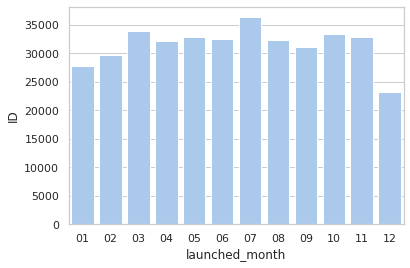

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")

count=g.count()
fig = plt.figure()
sns.barplot(x=count.index, y="ID", data=count, color="b")
plt.ylabel = "Count"


## The Marvel Universe Social Network

Using the [The Marvel Universe Social Network](https://www.kaggle.com/csanhueza/the-marvel-universe-social-network) and  Pandas, please answer the following questions:

In [16]:
# download and unzip dataset
!kaggle datasets list -s Marvel Universe Social Network 
!kaggle datasets download csanhueza/the-marvel-universe-social-network -p ./datasets/marvel/
!unzip ./datasets/marvel/*.zip  -d ./datasets/marvel/

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: unrecognized arguments: Universe Social Network
  0% 0.00/2.72M [00:00<?, ?B/s]
100% 2.72M/2.72M [00:00<00:00, 43.9MB/s]
Archive:  ./datasets/marvel/the-marvel-universe-social-network.zip
  inflating: ./datasets/marvel/edges.csv  
  inflating: ./datasets/marvel/hero-network.csv  
  inflating: ./datasets/marvel/nodes.csv  


In [17]:
MARVEL_CSV_PATH = "./datasets/marvel/hero-network.csv"
marvel_df = pd.read_csv(MARVEL_CSV_PATH)
marvel_df

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
...,...,...
574462,COLOSSUS II/PETER RA,CALLISTO
574463,CALLISTO,ROGUE /
574464,CALLISTO,CALIBAN/
574465,CALIBAN/,ROGUE /


**Question 1:** Write code which calculate the top-10 most friendly characters, i.e., characters with the 
    highest number of friends. Please use _hero_network.csv_ file (15pt). 
    
**Note:** Not all the links in this dataset are symmetric.

In [18]:
#  Not all the links in this dataset are symmetric, we need to creat one big df with all links:

tmp_df = marvel_df.copy()
tmp_df[['hero1','hero2']] = tmp_df[['hero2','hero1']]
print(tmp_df.shape, marvel_df.shape)

(574467, 2) (574467, 2)


In [19]:
marvel_df = pd.concat([marvel_df, tmp_df])
marvel_df.shape

(1148934, 2)

In [20]:
g = marvel_df.groupby("hero1")
print("top-10 most friendly characters:")
friends_count = g.count().sort_values("hero2", ascending=0)
friends_count.head(10)

top-10 most friendly characters:


,hero2
hero1,
CAPTAIN AMERICA,16499
SPIDER-MAN/PETER PAR,13717
IRON MAN/TONY STARK,11817
THOR/DR. DONALD BLAK,11427
THING/BENJAMIN J. GR,10681
WOLVERINE/LOGAN,10353
HUMAN TORCH/JOHNNY S,10237
SCARLET WITCH/WANDA,9911
MR. FANTASTIC/REED R,9775


**Question 2:** Using Pandas and Networkx create a graph object of The Marvel Universe Social Network with the 150 most "friendly" characters (10pt).
    The vertices in that graph need to be relative to the size of each character's number of links (also referred to as the vertex degree) (10pt).
Please color each node in the graph according to character type according to data in the *nodes.csv* file (5pt)

In [21]:
NODES_CSV_PATH = "./datasets/marvel/nodes.csv"
nodes_df = pd.read_csv(NODES_CSV_PATH)
nodes_df

,node,type
0,2001 10,comic
1,2001 8,comic
2,2001 9,comic
3,24-HOUR MAN/EMMANUEL,hero
4,3-D MAN/CHARLES CHAN,hero
...,...,...
19085,"ZOTA, CARLO",hero
19086,ZOTA,hero
19087,ZURAS,hero
19088,ZURI,hero


In [22]:
import networkx as nx
%matplotlib inline

verticies = set(friends_count.head(150)['hero2'].index)
links = []
i=0
for hero1, hero1_df in g:
  if hero1 in verticies: 
    for hero2 in hero1_df["hero2"]:
      if hero2 in verticies:
        links.append((hero1,hero2))
        links.append((hero2,hero1))
  
graph = nx.DiGraph()
graph.add_edges_from(set(links))
nx.info(graph)



'DiGraph with 150 nodes and 16242 edges'

In [55]:
import numpy as np
types = list(np.unique(nodes_df["type"].values))
print(types)
types_dic = {'comic': "red", 'hero':"blue", "no_type": "green"}
types_dic

['comic', 'hero']


{'comic': 'red', 'hero': 'blue', 'no_type': 'green'}

In [58]:
d =  dict(graph.degree)


node_colors = []
# add node color by type
for node in graph.nodes(data=True):
  type_list = nodes_df[nodes_df['node']==node[0]]["type"].values
  node_type = "no_type" if len(type_list)==0 else type_list[0]
  node_colors.append(types_dic.get(node_type))

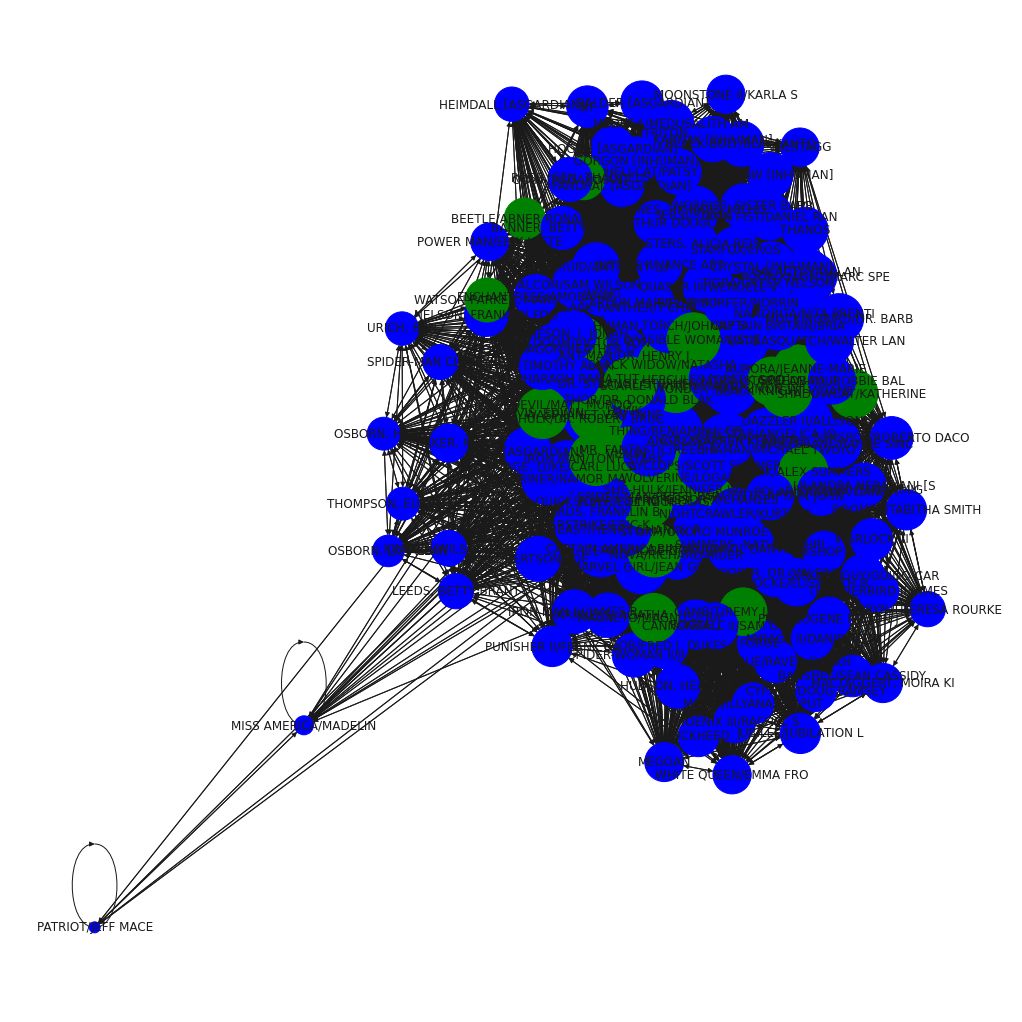

In [59]:
import matplotlib.pyplot as plt
plt.figure(3,figsize=(14,14))
nx.draw(graph, nodelist=list(d.keys()), node_size=[v*10  for v in d.values()], with_labels=True, node_color=node_colors)


**Bonus:** Visualize the above network using [Cytoscape](https://cytoscape.org) or [Gephi](https://gephi.org) (10pt)